In [1]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 73.5 MB/s eta 0:00:00


In [2]:
import matplotlib.font_manager

In [3]:
pip install adjustText

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=7f9440e605c42226d602e3acbc63414d18601fc8d6a8033ed1d455da2815e2c5
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
Successfully built adjustText


In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from geopandas import GeoDataFrame
from shapely.geometry import Point
import adjustText as aT

In [7]:
fp = "drive/MyDrive/Colab Notebooks/Indianstate/India_State_Boundary.shp"
map_df = gpd.read_file(fp)
map_df.head()

,State_Name,geometry
0,Andaman & Nicobar,"MULTIPOLYGON (((10341718.474 1449533.161, 1034..."
1,Chandigarh,"POLYGON ((8546255.616 3606050.813, 8546315.400..."
2,Daman and Diu and Dadra and Nagar Haveli,"MULTIPOLYGON (((8122247.822 2312434.407, 81223..."
3,Delhi,"POLYGON ((8583390.570 3359116.190, 8583476.212..."
4,Haryana,"POLYGON ((8524318.539 3516490.865, 8524451.392..."


In [8]:
map_df.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
map_df = map_df.to_crs("EPSG:3395")

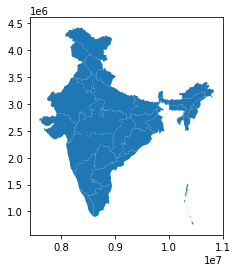

In [10]:
map_df = map_df[['State_Name', 'geometry']]
map_df.plot()

In [11]:
map_df.State_Name

0                            Andaman & Nicobar
1                                   Chandigarh
2     Daman and Diu and Dadra and Nagar Haveli
3                                        Delhi
4                                      Haryana
5                                    Jharkhand
6                                    Karnataka
7                                       Kerala
8                                  Lakshadweep
9                               Madhya Pradesh
10                                 Maharashtra
11                                      Odisha
12                                  Puducherry
13                                   Tamilnadu
14                               Chhattishgarh
15                                   Telengana
16                              Andhra Pradesh
17                                  Puducherry
18                                         Goa
19                            Himachal Pradesh
20                                      Punjab
21           

In [12]:
map_df['State_Name'] = map_df['State_Name'].str.upper()
map_df.head()

,State_Name,geometry
0,ANDAMAN & NICOBAR,"MULTIPOLYGON (((10341718.474 1439992.056, 1034..."
1,CHANDIGARH,"POLYGON ((8546255.616 3584178.689, 8546315.400..."
2,DAMAN AND DIU AND DADRA AND NAGAR HAVELI,"MULTIPOLYGON (((8122247.822 2297594.513, 81223..."
3,DELHI,"POLYGON ((8583390.570 3338489.968, 8583476.212..."
4,HARYANA,"POLYGON ((8524318.539 3495065.089, 8524451.392..."


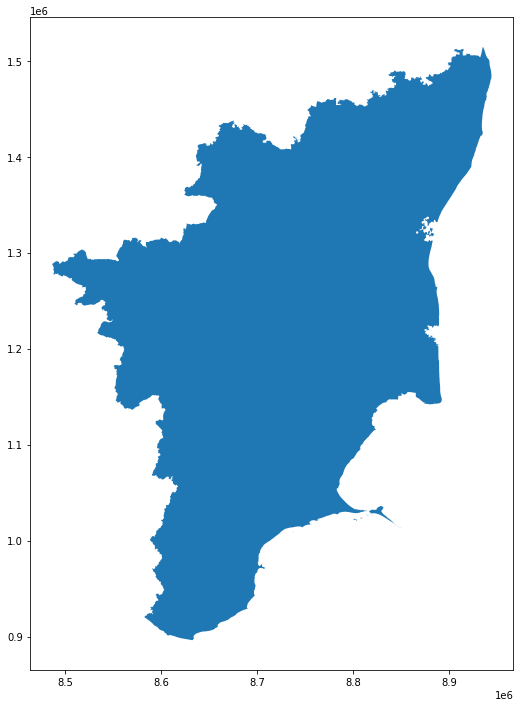

In [13]:
map_df[map_df['State_Name'] == 'TAMILNADU'].plot(figsize=(12, 12))

In [14]:
map_df.State_Name

0                            ANDAMAN & NICOBAR
1                                   CHANDIGARH
2     DAMAN AND DIU AND DADRA AND NAGAR HAVELI
3                                        DELHI
4                                      HARYANA
5                                    JHARKHAND
6                                    KARNATAKA
7                                       KERALA
8                                  LAKSHADWEEP
9                               MADHYA PRADESH
10                                 MAHARASHTRA
11                                      ODISHA
12                                  PUDUCHERRY
13                                   TAMILNADU
14                               CHHATTISHGARH
15                                   TELENGANA
16                              ANDHRA PRADESH
17                                  PUDUCHERRY
18                                         GOA
19                            HIMACHAL PRADESH
20                                      PUNJAB
21           

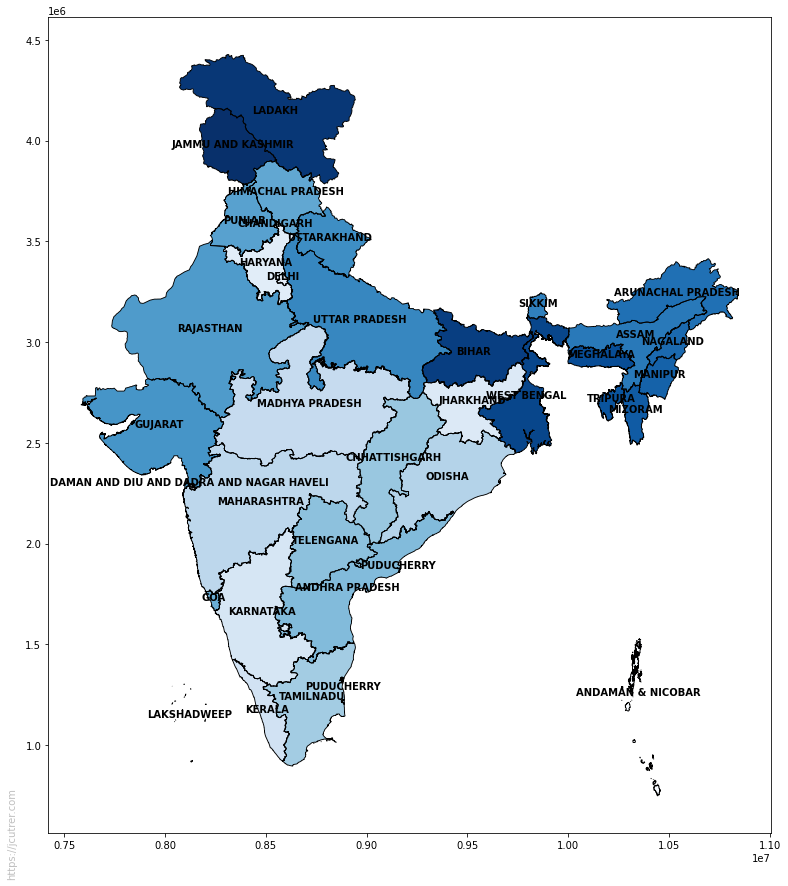

In [15]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
map_df.apply(lambda x: ax.annotate(s=x.State_Name, xy=x.geometry.centroid.coords[0], ha='center', fontsize=10,fontweight="bold"),axis=1);
map_df.boundary.plot(ax=ax, color='Black', linewidth=.9)
map_df.plot(ax=ax, cmap='Blues', figsize=(12, 12))
ax.text(-0.05, 0., 'https://jcutrer.com', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

plt.rcParams.update({'font.sans-serif':'Helvetica'})

In [19]:
df1 = pd.read_excel("drive/MyDrive/Colab Notebooks/Heart_attack/2021_heartattack_cases.xlsx")
df1.head()

,Unnamed: 0,State/UT,cases,male,female,trans,total,State_code
0,1.0,Andhra Pradesh,97.0,85.0,12.0,0.0,97.0,AD
1,2.0,Arunachal Pradesh,9.0,9.0,0.0,0.0,9.0,AR
2,3.0,Assam,25.0,23.0,2.0,0.0,25.0,AS
3,4.0,Bihar,121.0,103.0,28.0,0.0,131.0,BR
4,5.0,Chhattishgarh,424.0,359.0,65.0,0.0,424.0,CG


In [20]:
df2 = pd.read_excel("drive/MyDrive/Colab Notebooks/Heart_attack/2020_heartattack_cases.xlsx")
df2.head()

,Unnamed: 0,State/UT,cases,male,female,trans,total,State_code
0,1,Andhra Pradesh,97,92,5,0,97,AD
1,2,Arunachal Pradesh,3,2,1,0,3,AR
2,3,Assam,23,18,5,0,23,AS
3,4,Bihar,125,96,29,0,125,BR
4,5,Chhattishgarh,454,392,65,0,457,CG


In [21]:
df1['State/UT'] = df1['State/UT'].str.upper()
df1.fillna(0,inplace=True)
df1.head()

,Unnamed: 0,State/UT,cases,male,female,trans,total,State_code
0,1.0,ANDHRA PRADESH,97.0,85.0,12.0,0.0,97.0,AD
1,2.0,ARUNACHAL PRADESH,9.0,9.0,0.0,0.0,9.0,AR
2,3.0,ASSAM,25.0,23.0,2.0,0.0,25.0,AS
3,4.0,BIHAR,121.0,103.0,28.0,0.0,131.0,BR
4,5.0,CHHATTISHGARH,424.0,359.0,65.0,0.0,424.0,CG


In [22]:
df2['State/UT'] = df2['State/UT'].str.upper()
df2.fillna(0,inplace=True)
df2.head()

,Unnamed: 0,State/UT,cases,male,female,trans,total,State_code
0,1,ANDHRA PRADESH,97,92,5,0,97,AD
1,2,ARUNACHAL PRADESH,3,2,1,0,3,AR
2,3,ASSAM,23,18,5,0,23,AS
3,4,BIHAR,125,96,29,0,125,BR
4,5,CHHATTISHGARH,454,392,65,0,457,CG


In [23]:
df1.rename(columns = {'State/UT':'State_Name'}, inplace = True)
df2.rename(columns = {'State/UT':'State_Name'}, inplace = True)

In [24]:
map_df1 = map_df.merge(df1,on='State_Name')
map_df1.head()

,State_Name,geometry,Unnamed: 0,cases,male,female,trans,total,State_code
0,ANDAMAN & NICOBAR,"MULTIPOLYGON (((10341718.474 1439992.056, 1034...",29.0,21.0,18.0,3.0,0.0,21.0,AN
1,CHANDIGARH,"POLYGON ((8546255.616 3584178.689, 8546315.400...",30.0,40.0,35.0,5.0,0.0,40.0,CH
2,DAMAN AND DIU AND DADRA AND NAGAR HAVELI,"MULTIPOLYGON (((8122247.822 2297594.513, 81223...",31.0,31.0,29.0,2.0,0.0,31.0,DNHDD
3,DELHI,"POLYGON ((8583390.570 3338489.968, 8583476.212...",32.0,302.0,255.0,47.0,0.0,302.0,DL
4,HARYANA,"POLYGON ((8524318.539 3495065.089, 8524451.392...",8.0,1159.0,1062.0,97.0,0.0,1159.0,HR


In [30]:
map_df2 = map_df.merge(df2,on='State_Name')
map_df2.head()

,State_Name,geometry,Unnamed: 0,cases,male,female,trans,total,State_code
0,ANDAMAN & NICOBAR,"MULTIPOLYGON (((10341718.474 1439992.056, 1034...",29,25,20,5,0,25,AN
1,CHANDIGARH,"POLYGON ((8546255.616 3584178.689, 8546315.400...",30,73,96,19,0,115,CH
2,DAMAN AND DIU AND DADRA AND NAGAR HAVELI,"MULTIPOLYGON (((8122247.822 2297594.513, 81223...",31,19,19,0,0,19,DNHDD
3,DELHI,"POLYGON ((8583390.570 3338489.968, 8583476.212...",32,268,229,38,1,268,DL
4,HARYANA,"POLYGON ((8524318.539 3495065.089, 8524451.392...",8,1108,1011,97,0,1108,HR


In [26]:
map_df1.shape

(37, 9)

In [31]:
map_df2.shape

(37, 9)

In [27]:
convert_dict = {'total': int,'cases': int,'male':int,'female':int,'trans':int
                }
map_df1 = map_df1.astype(convert_dict)

In [28]:
map_df1.head()

,State_Name,geometry,Unnamed: 0,cases,male,female,trans,total,State_code
0,ANDAMAN & NICOBAR,"MULTIPOLYGON (((10341718.474 1439992.056, 1034...",29.0,21,18,3,0,21,AN
1,CHANDIGARH,"POLYGON ((8546255.616 3584178.689, 8546315.400...",30.0,40,35,5,0,40,CH
2,DAMAN AND DIU AND DADRA AND NAGAR HAVELI,"MULTIPOLYGON (((8122247.822 2297594.513, 81223...",31.0,31,29,2,0,31,DNHDD
3,DELHI,"POLYGON ((8583390.570 3338489.968, 8583476.212...",32.0,302,255,47,0,302,DL
4,HARYANA,"POLYGON ((8524318.539 3495065.089, 8524451.392...",8.0,1159,1062,97,0,1159,HR


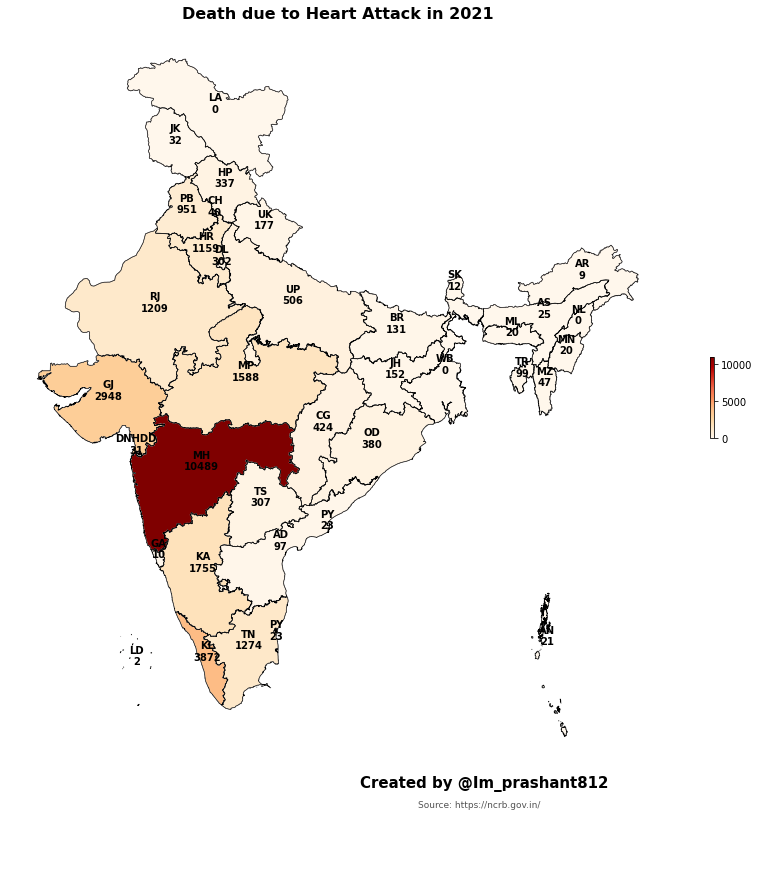

In [53]:
import math
fig = plt.figure(1, figsize=(15,15)) 
ax = fig.add_subplot()
map_df1.apply(lambda x: ax.annotate(
    s=x.State_code + "\n" + str(x.total), 
    xy=x.geometry.centroid.coords[0],
    ha='center', 
    fontsize=10,fontweight="bold"
),axis=1);
map_df1.boundary.plot(ax=ax, color='Black', linewidth=0.5)
map_df1.plot(ax=ax, cmap='OrRd', figsize=(12, 12))


ax.axis('off')
ax.set_title('Death due to Heart Attack in 2021', fontdict={'fontsize': '16', 'fontweight' : 'bold','fontname':'Helvetica'})
ax.annotate('Source: https://ncrb.gov.in/',xy=(0.55, 0.08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=9, color='#555555')
ax.annotate('Created by @Im_prashant812',xy=(0.8, 0.1),  xycoords='figure fraction', horizontalalignment='right', verticalalignment='center', fontsize=15, color='Black',fontweight = 'bold',fontname='Helvetica')

map_df1.plot(column=map_df1.total, cmap='OrRd', linewidth=0.9, ax=ax, edgecolor='0.6', legend=False)
plt.rcParams.update({'font.sans-serif':'Helvetica'})

vmin, vmax = 0, 11000
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm,fraction = 0.16,shrink = 0.1)

#map_df.plot(column=Total_cases, cmap='Reds', linewidth=0.6, ax=ax, edgecolor='0.6', legend=True)

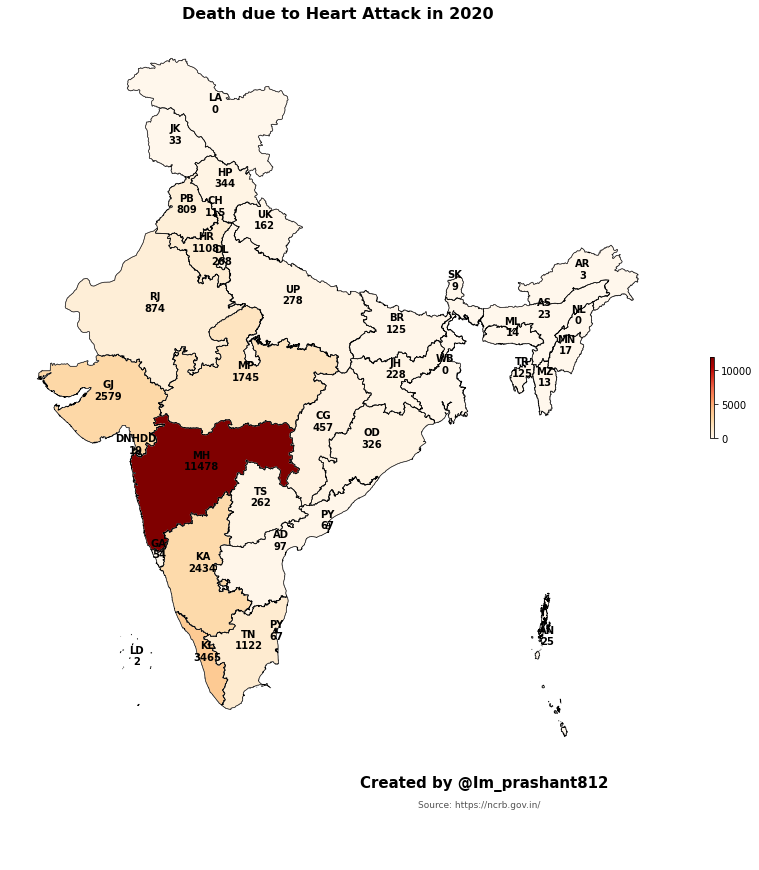

In [52]:
import math
fig = plt.figure(1, figsize=(15,15)) 
ax = fig.add_subplot()
map_df2.apply(lambda x: ax.annotate(
    s=x.State_code + "\n" + str(x.total), 
    xy=x.geometry.centroid.coords[0],
    ha='center', 
    fontsize=10,fontweight="bold"
),axis=1);
map_df2.boundary.plot(ax=ax, color='Black', linewidth=0.5)
map_df2.plot(ax=ax, cmap='OrRd', figsize=(12, 12))


ax.axis('off')
ax.set_title('Death due to Heart Attack in 2020', fontdict={'fontsize': '16', 'fontweight' : 'bold','fontname':'Helvetica'})
ax.annotate('Source: https://ncrb.gov.in/',xy=(0.55, 0.08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=9, color='#555555')
ax.annotate('Created by @Im_prashant812',xy=(0.8, 0.1),  xycoords='figure fraction', horizontalalignment='right', verticalalignment='center', fontsize=15, color='Black',fontweight = 'bold',fontname='Helvetica')

map_df2.plot(column=map_df2.total, cmap='OrRd', linewidth=0.9, ax=ax, edgecolor='0.6', legend=False)
plt.rcParams.update({'font.sans-serif':'Helvetica'})

vmin, vmax = 0, 12000
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm,fraction = 0.16,shrink = 0.1)
